In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# 기하 브라운 운동을 사용한 주가 역학 시뮬레이션
금융 시장 예측 불가능, 옵션과 같은 많은 파생 상품의 평가에 중요한 역할, 앞서 언급한 가격 변동의 임의성(예측 불가능)으로 인해 이 시뮬레이션은 확률적 미분 방정식(SDE)에 의존한다.

확률적 프로세스가 다음의 SDE를 만족하면 기하 브라운 운동(GBM)을 따른다고 말한다.
$$dS = \mu Sdt + \sigma SdW_t$$
우변의 첫번째 항은 추세를, 두번째 항은 변동성을 의미한다. **수학적인 이해는 후에 추가로 찾아볼 것**
- $S$:주가
- $\mu$:드리프트 계수-주어진 기간에 대한 평균 수익률 또는 즉시 기대 수익률
- $\sigma$:디퓨전 계수 - 드리프트에서의 변동성
- $W_t$:브라운 운동

$dW_t$(브라운 증분)는 표준 정규 확률 변수와 시간 증분의 제곱근의 곱으로 계산된다는 정도로만 이해한다. 브라운 증분의 누적 합으로 브라운 경로를 얻는다.

어떤 SDE는 다음의 닫힌 해를 가진다.

$$S(t) = S_0e^{(\mu-1/2\sigma^2)t + \sigma W_t}$$

시뮬레이션을 하기 위해서는 이를 재귀식으로 표현한다. 
$$S(t_{i+1}) = S(t_i)exp((\mu-1/2\sigma^2)(t_{i+1}-t_{i})) + \sigma\sqrt{t_{i+1} - t_i}Z_{i+1}$$
- $e^x$와 $exp(x)$가 같은 것 같음.
$Z_i$는 표준 정규 확률 변수 W의 증분은 독립적이고 정규 분포이기 때문에 위의 표기 가능하다.

! GBM은 평균-복귀 및 시간-종속 변동성을 고려하지 않는 프로세스다. 그렇기 때문에 주식에는 자주 사용되나, 장기적으로 액면가로 복귀하는 경향이 있는 채권 가격에는 사용되지 않는다.

몬테카를로 방법과 GBM을 활용해 한 달 이전 마이크로소프트의 주가를 시뮬레이션한다.

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

RISKY_ASSET = 'MSFT'
S_D = '2019-01-01' # Start date
E_D = '2019-07-31'

In [3]:
df = yf.download(RISKY_ASSET, start=S_D, end = E_D, adjusted = True)

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,101.290001,102.400002,100.440002,101.570000,98.813278,33173800
2019-01-02,99.550003,101.750000,98.940002,101.120003,98.375481,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,94.756454,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,99.163513,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,99.289970,35656100
...,...,...,...,...,...,...
2019-07-24,138.899994,140.740005,138.850006,140.720001,137.994293,20738300
2019-07-25,140.429993,140.610001,139.320007,140.190002,137.474548,18356900
2019-07-26,140.369995,141.679993,140.300003,141.339996,138.602264,19037600


avg return: 0.24%


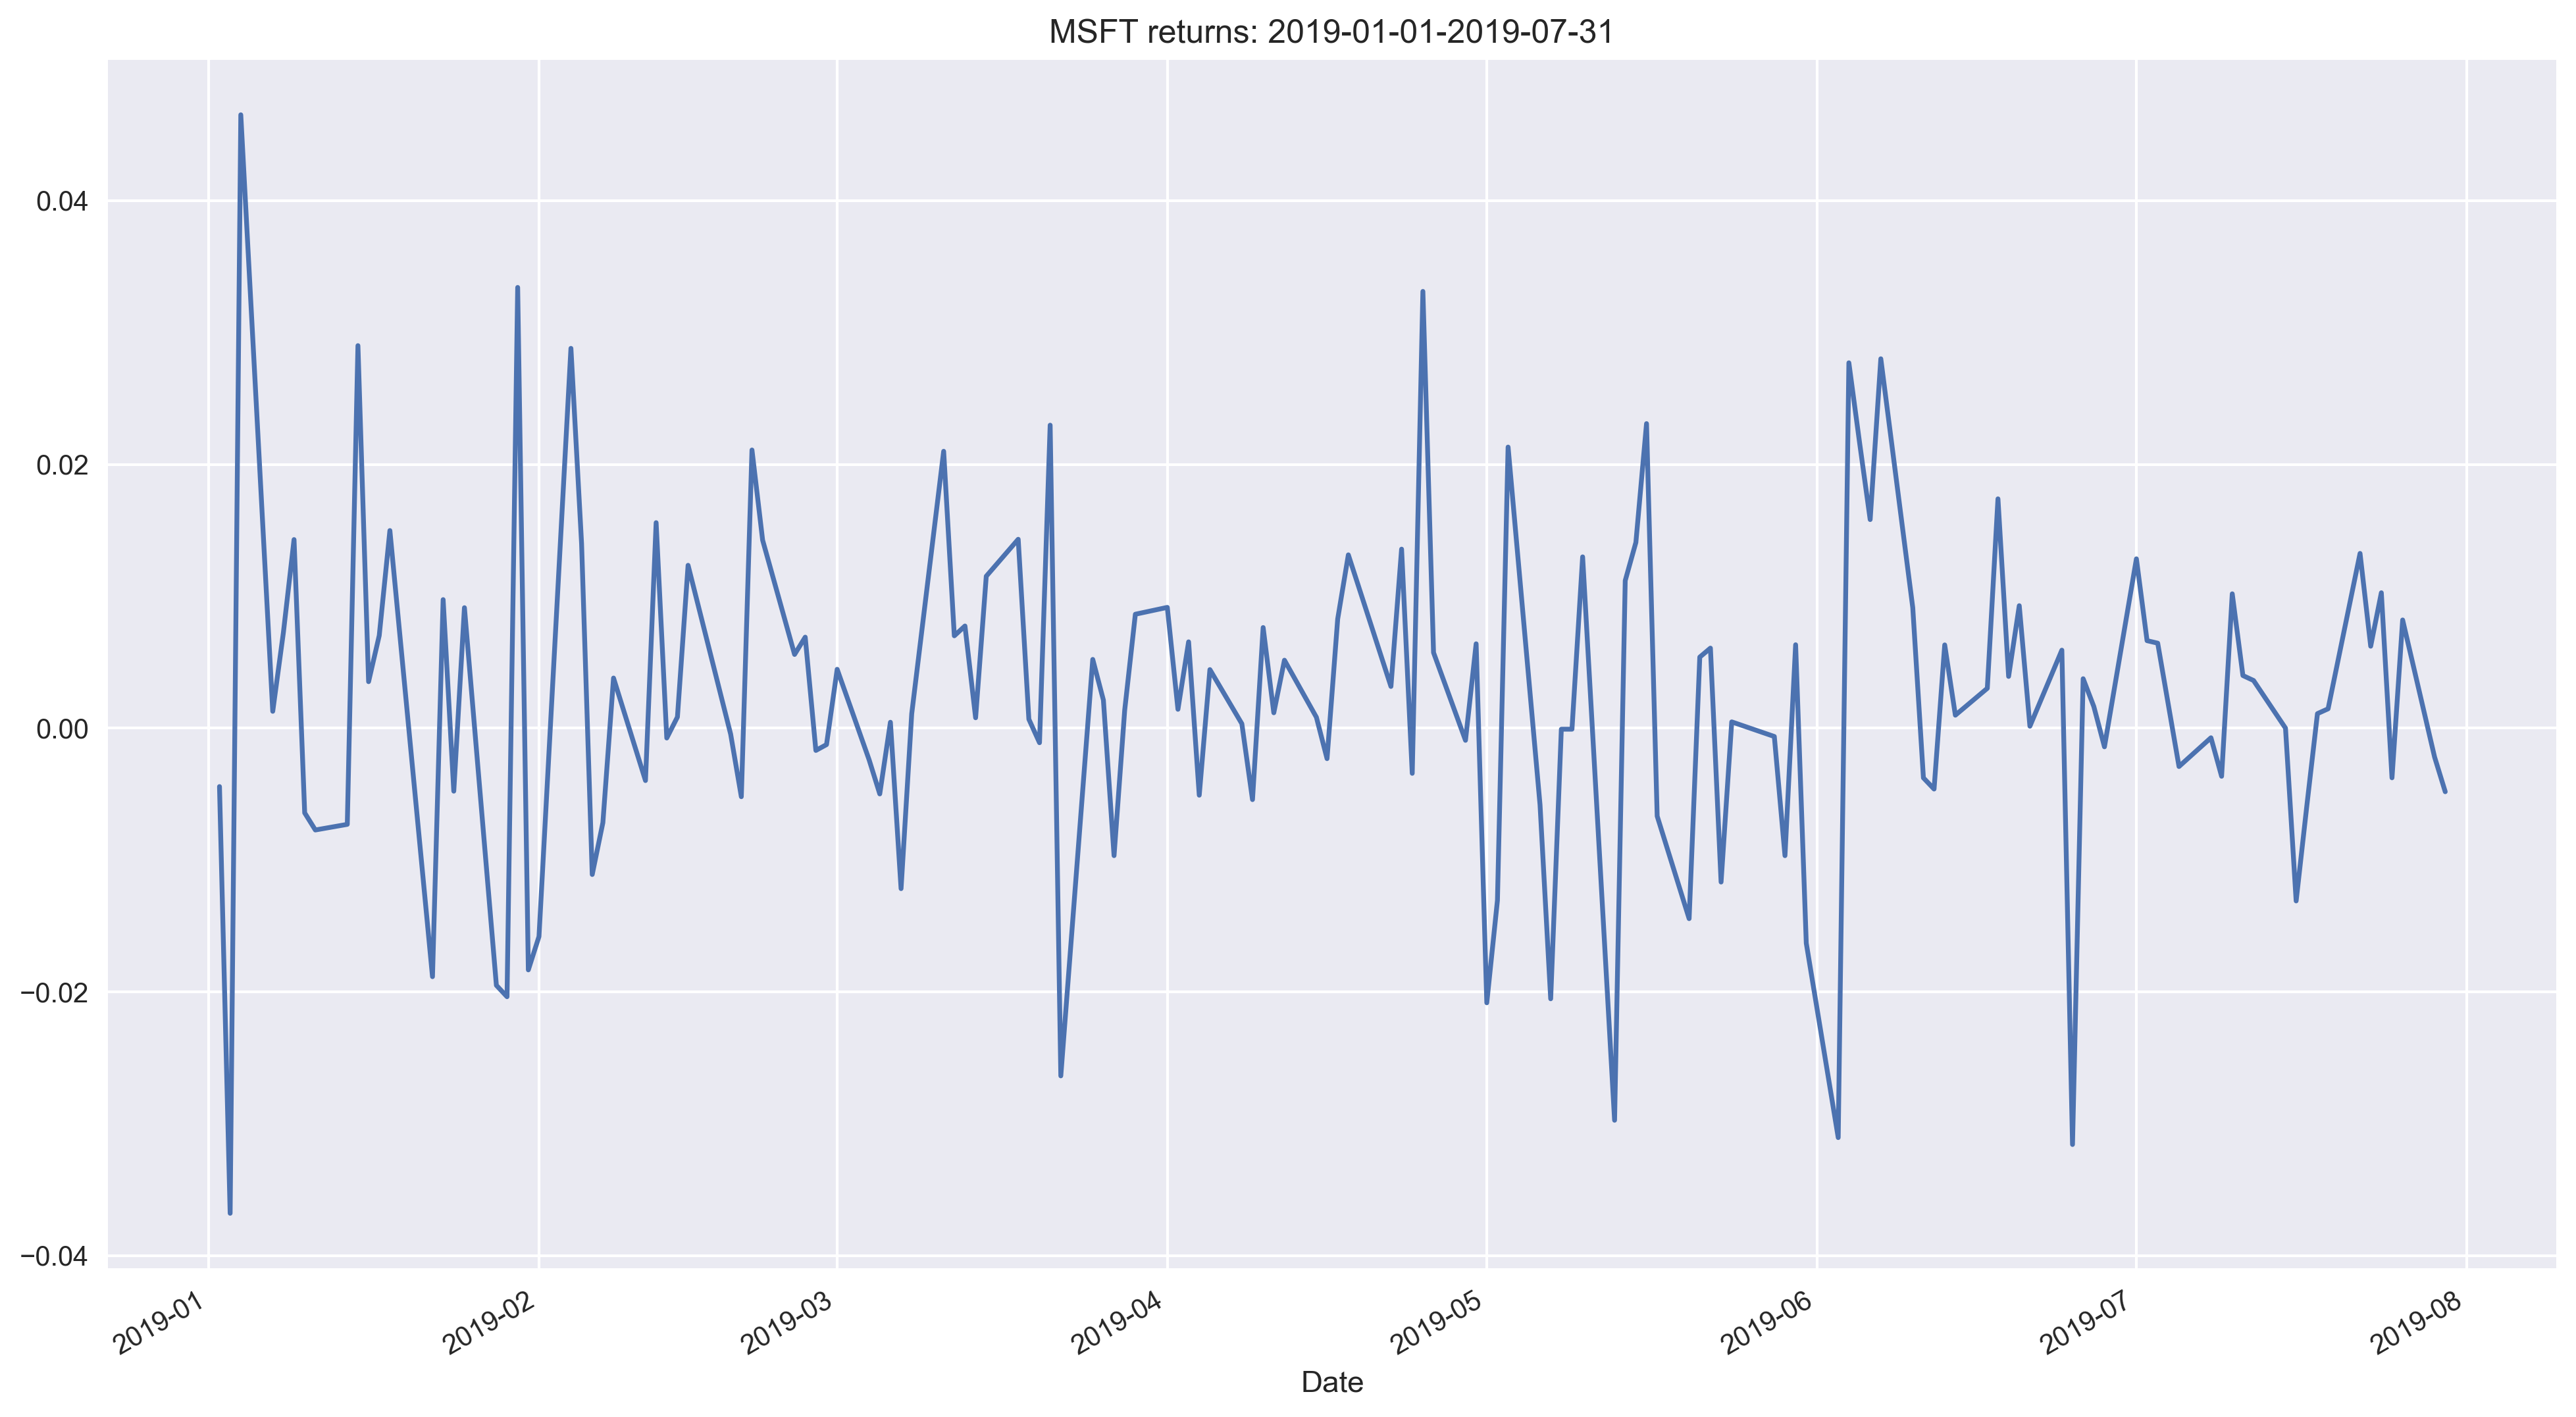

In [9]:
# 수익률 계산
adj_close = df['Adj Close']
rtns = adj_close.pct_change().dropna() # simple return
print('='*20)
print(f'avg return: {100*rtns.mean():.2f}%')
print('='*20)

rtns.plot(title=f'{RISKY_ASSET} returns: {S_D}-{E_D}')

In [10]:
train = rtns['2019-01-01':'2019-06-30']
test = rtns['2019-07-01':]

In [11]:
train

Date
2019-01-02   -0.004431
2019-01-03   -0.036788
2019-01-04    0.046509
2019-01-07    0.001275
2019-01-08    0.007251
                ...   
2019-06-24    0.005914
2019-06-25   -0.031572
2019-06-26    0.003747
2019-06-27    0.001643
2019-06-28   -0.001416
Name: Adj Close, Length: 124, dtype: float64

In [12]:
test

Date
2019-07-01    0.012840
2019-07-02    0.006633
2019-07-03    0.006443
2019-07-05   -0.002910
2019-07-08   -0.000730
2019-07-09   -0.003651
2019-07-10    0.010186
2019-07-11    0.003990
2019-07-12    0.003613
2019-07-15    0.000000
2019-07-16   -0.013103
2019-07-17   -0.005909
2019-07-18    0.001101
2019-07-19    0.001466
2019-07-22    0.013248
2019-07-23    0.006213
2019-07-24    0.010266
2019-07-25   -0.003766
2019-07-26    0.008203
2019-07-29   -0.002193
2019-07-30   -0.004822
Name: Adj Close, dtype: float64

In [17]:
T = len(test) # 예측기간
N = len(test) # 예상 호라이즌에서의 시간 증분 수

# S_0 = adj_close[train.index[-1].date()] # 최초 가격 이거 안되는디??
S_0 = adj_close[train.index[-1]]
N_SIM = 100 # 시뮬레이션된 경로수 

mu = train.mean()
sigma = train.std()

In [18]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale=np.sqrt(dt), size = (n_sims, N))
    W = np.cumsum(dW, axis = 1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0*np.exp((mu-0.5*sigma**2)*time_steps +sigma*W)
    S_t = np.insert(S_t, 0, s_0, axis = 1)
    return S_t

In [19]:
gbm_simulation = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

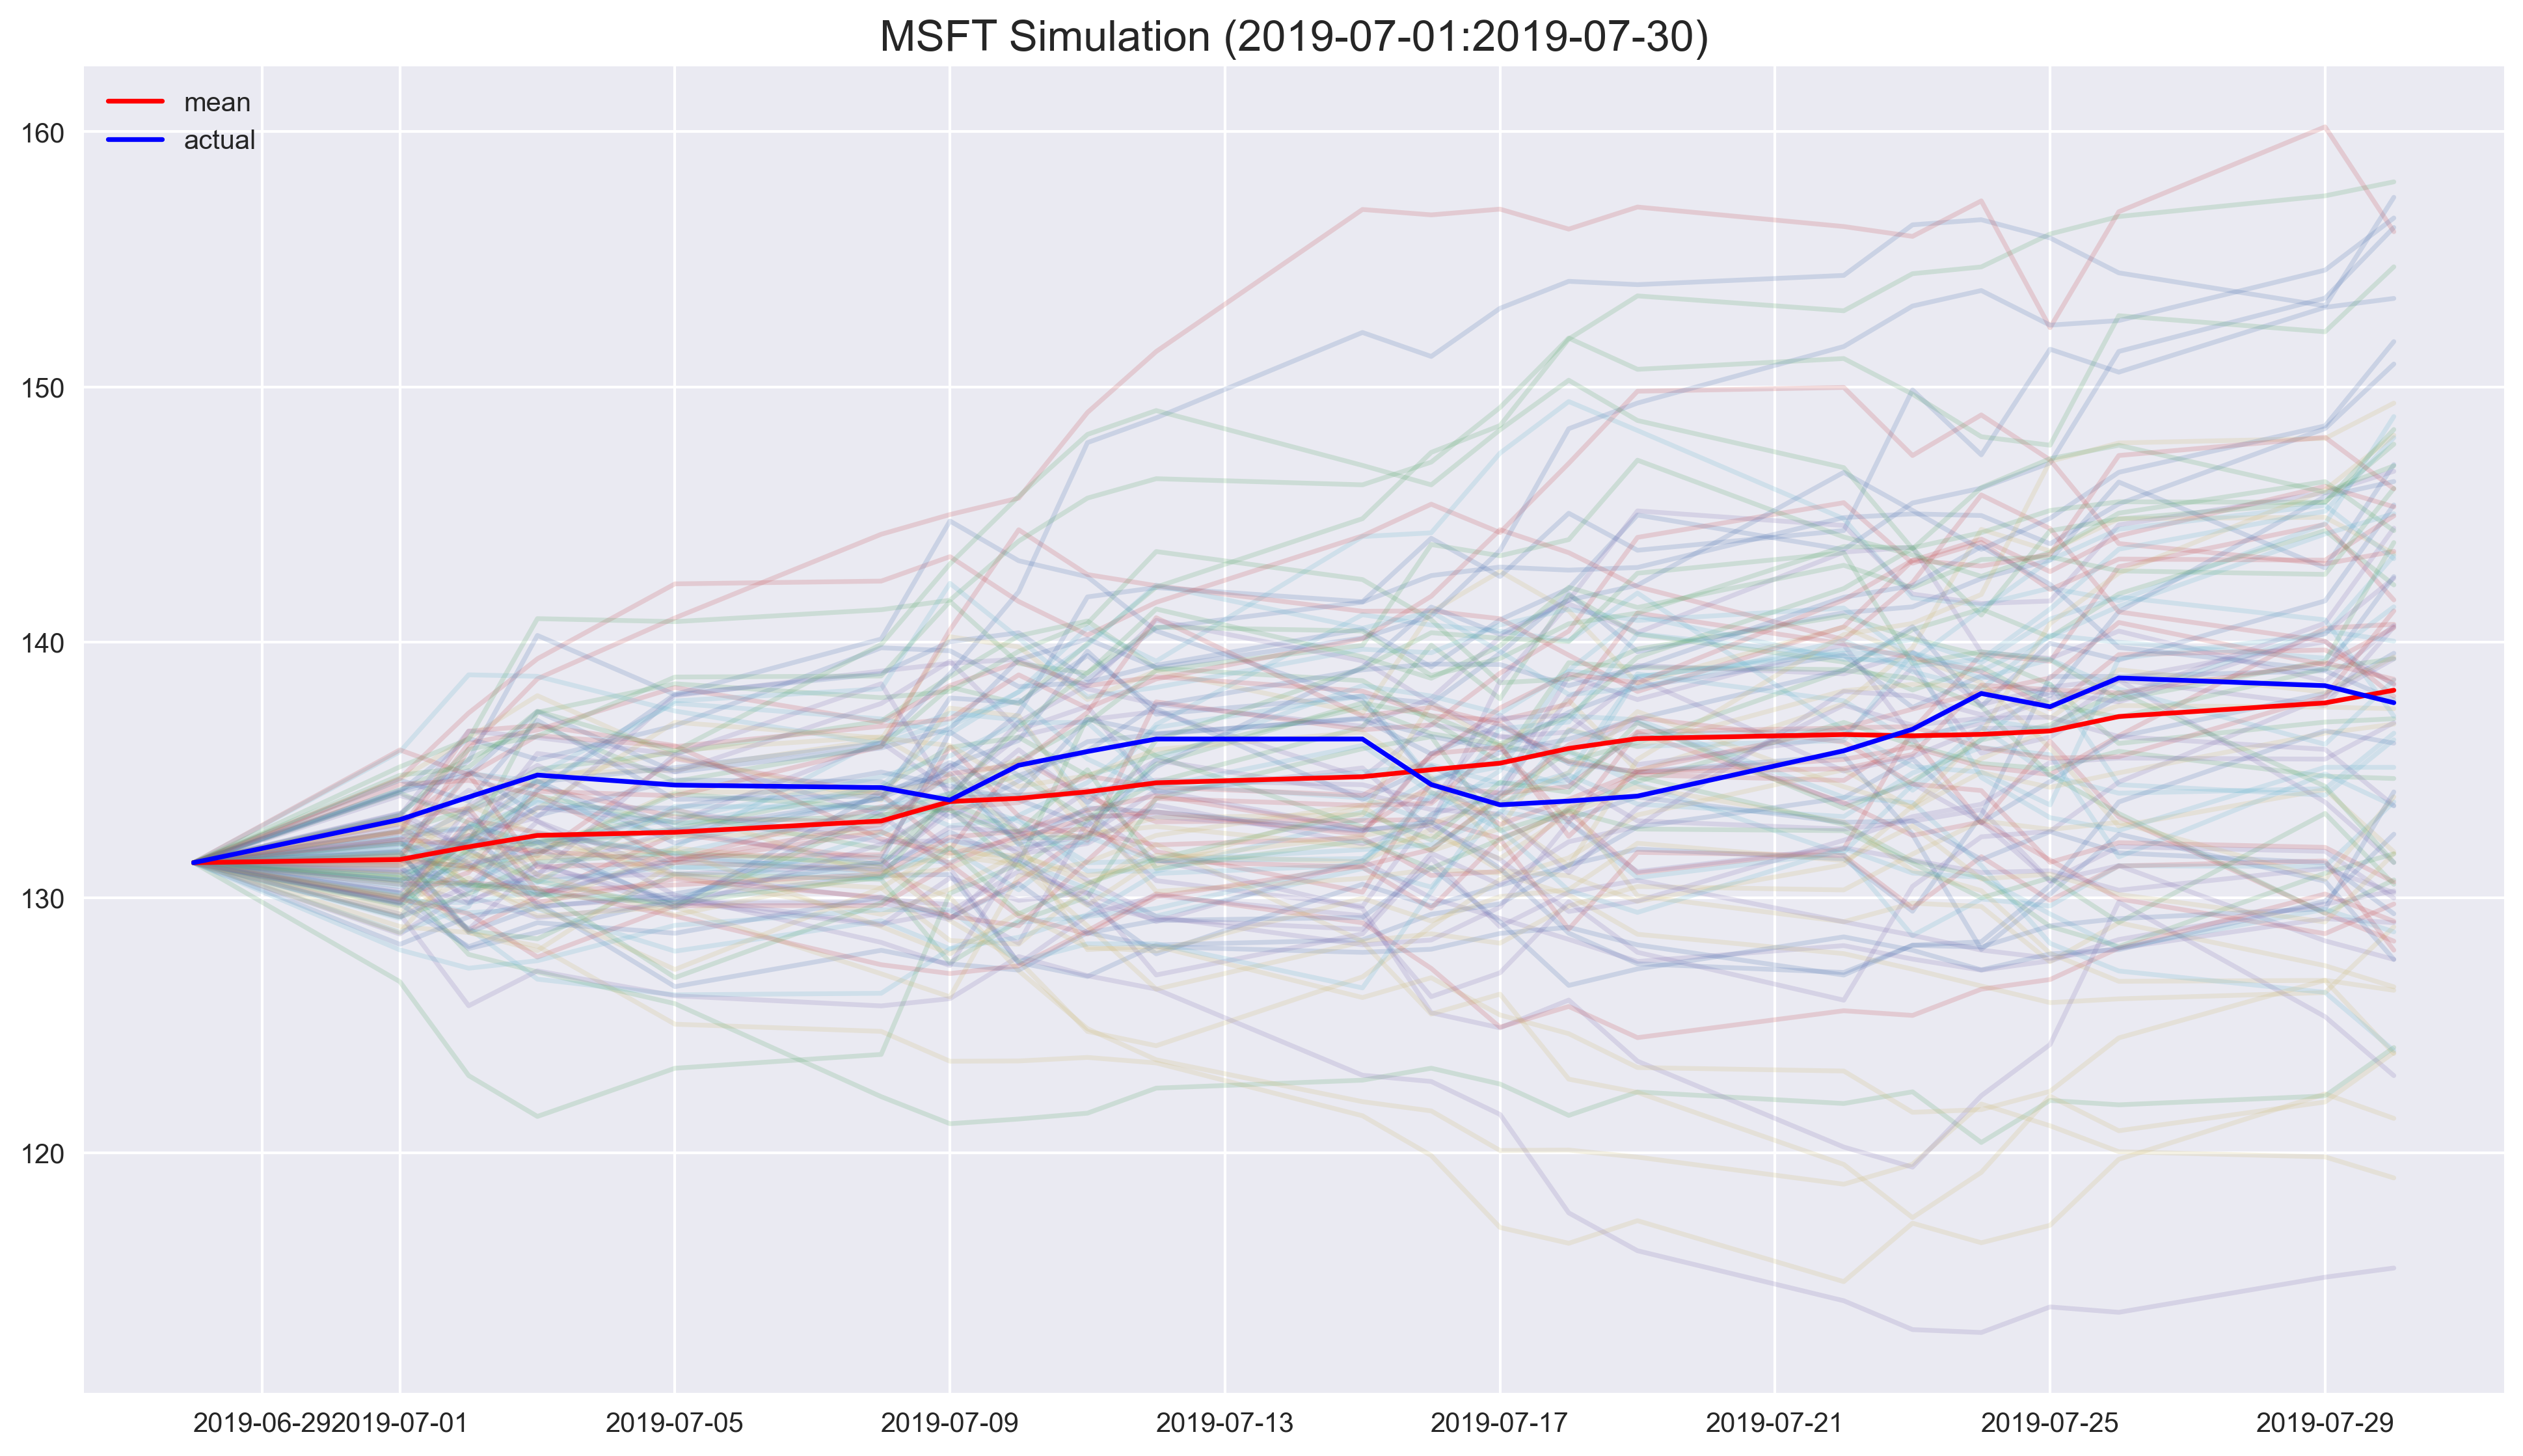

In [20]:
LAST_TRN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = f'{RISKY_ASSET} Simulation ({FIRST_TEST_DATE}:{LAST_TEST_DATE})'

selected_indices = adj_close[LAST_TRN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulation_df = pd.DataFrame(np.transpose(gbm_simulation), index = index)

ax = gbm_simulation_df.plot(alpha = 0.2, legend = False)
line_1, = ax.plot(index, gbm_simulation_df.mean(axis = 1), color = 'red')
line_2, = ax.plot(index, adj_close[LAST_TRN_DATE:LAST_TEST_DATE], color = 'blue')
ax.set_title(PLOT_TITLE, fontsize = 16)
ax.legend((line_1, line_2), ("mean", 'actual'))

In [22]:
# Fast Version - 대조 변수법
# 이해 전혀 못함: TODO: 금융 공학?과 통계학을 전부 공부해야할 듯. 갈 길이 멀다.
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, antithetic_var = False):
    dt = T/N
    if antithetic_var:
        dW_ant = np.random.normal(scale=np.sqrt(dt), size = (int(n_sims/2), N+1))
        dW = np.concatenate((dW_ant, -dW_ant), axis = 0)
    else:
        dW = np.random.normal(scale=np.sqrt(dt), size = (n_sims, N+1))
    # W = np.cumsum(dW, axis = 1)
    # 
    # time_step = np.linspace(dt, T, N)
    # time_steps = np.broadcast_to(time_step, (n_sims, N))
    # 
    # S_t = s_0*np.exp((mu-0.5*sigma**2)*time_steps +sigma*W)
    # S_t = np.insert(S_t, 0, s_0, axis = 1)

    S_t = s_0 * np.exp(np.cumsum((mu-0.5*sigma**2)*dt + sigma*dw, axis = 1))

    S_t[:,0] = s_0

    return S_t